In [6]:
from causal_nh.utils import generate_synthetic_dataset, plot_sample_ts, safe_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
import pickle

In [8]:
%matplotlib inline

In [21]:
dim_process = 3


if dim_process == 2:
    A = np.array([[0.2, 0],
                  [0.1, 0.2]])
else:
    A = np.random.random((dim_process, dim_process))
#     A = A + np.eye(N = dim_process)
    A[A >= 0.5] = 1
    A[A < 0.5] = 0
    A = A*0.2



dataset, intensities = generate_synthetic_dataset(type_size=dim_process,
                                                  adjacency=A,
                                                  len_dataset=300,
                                                  baseline_intensity=0.5)

In [22]:
A

array([[0.2, 0.2, 0.2],
       [0.2, 0.2, 0. ],
       [0. , 0.2, 0. ]])

In [23]:
safe_dataset('synth_3_events_small', dataset, dim_process, A, intensities)

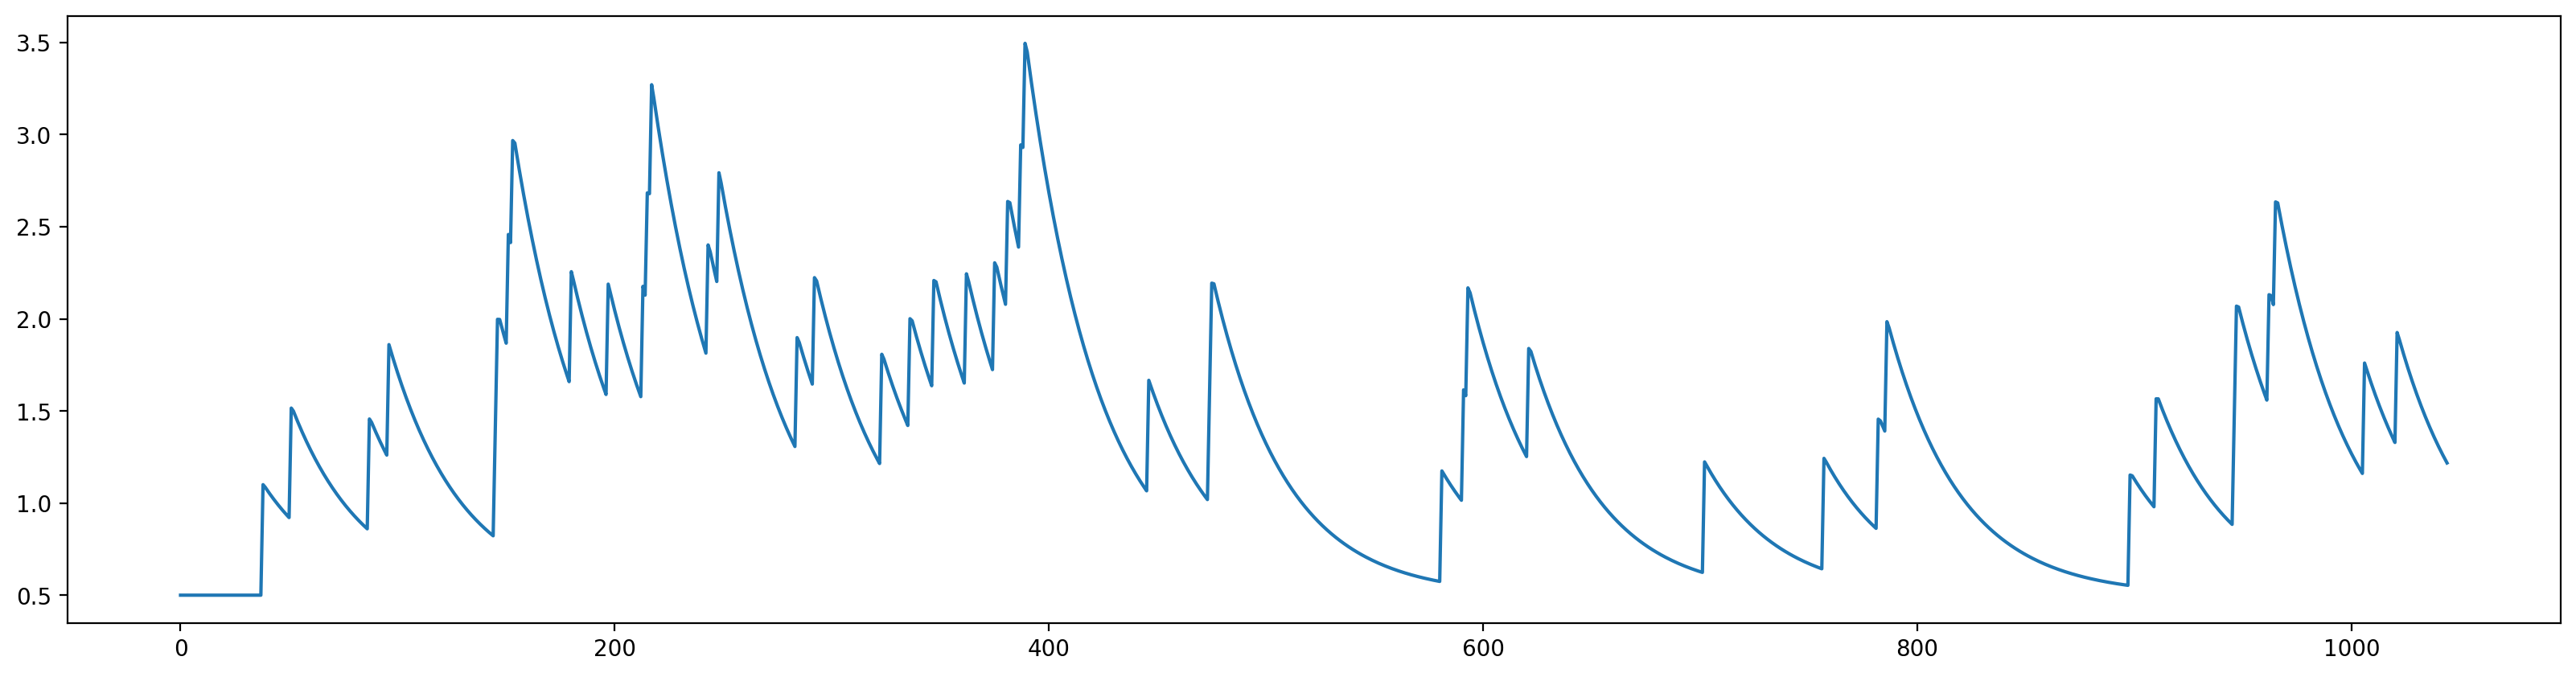

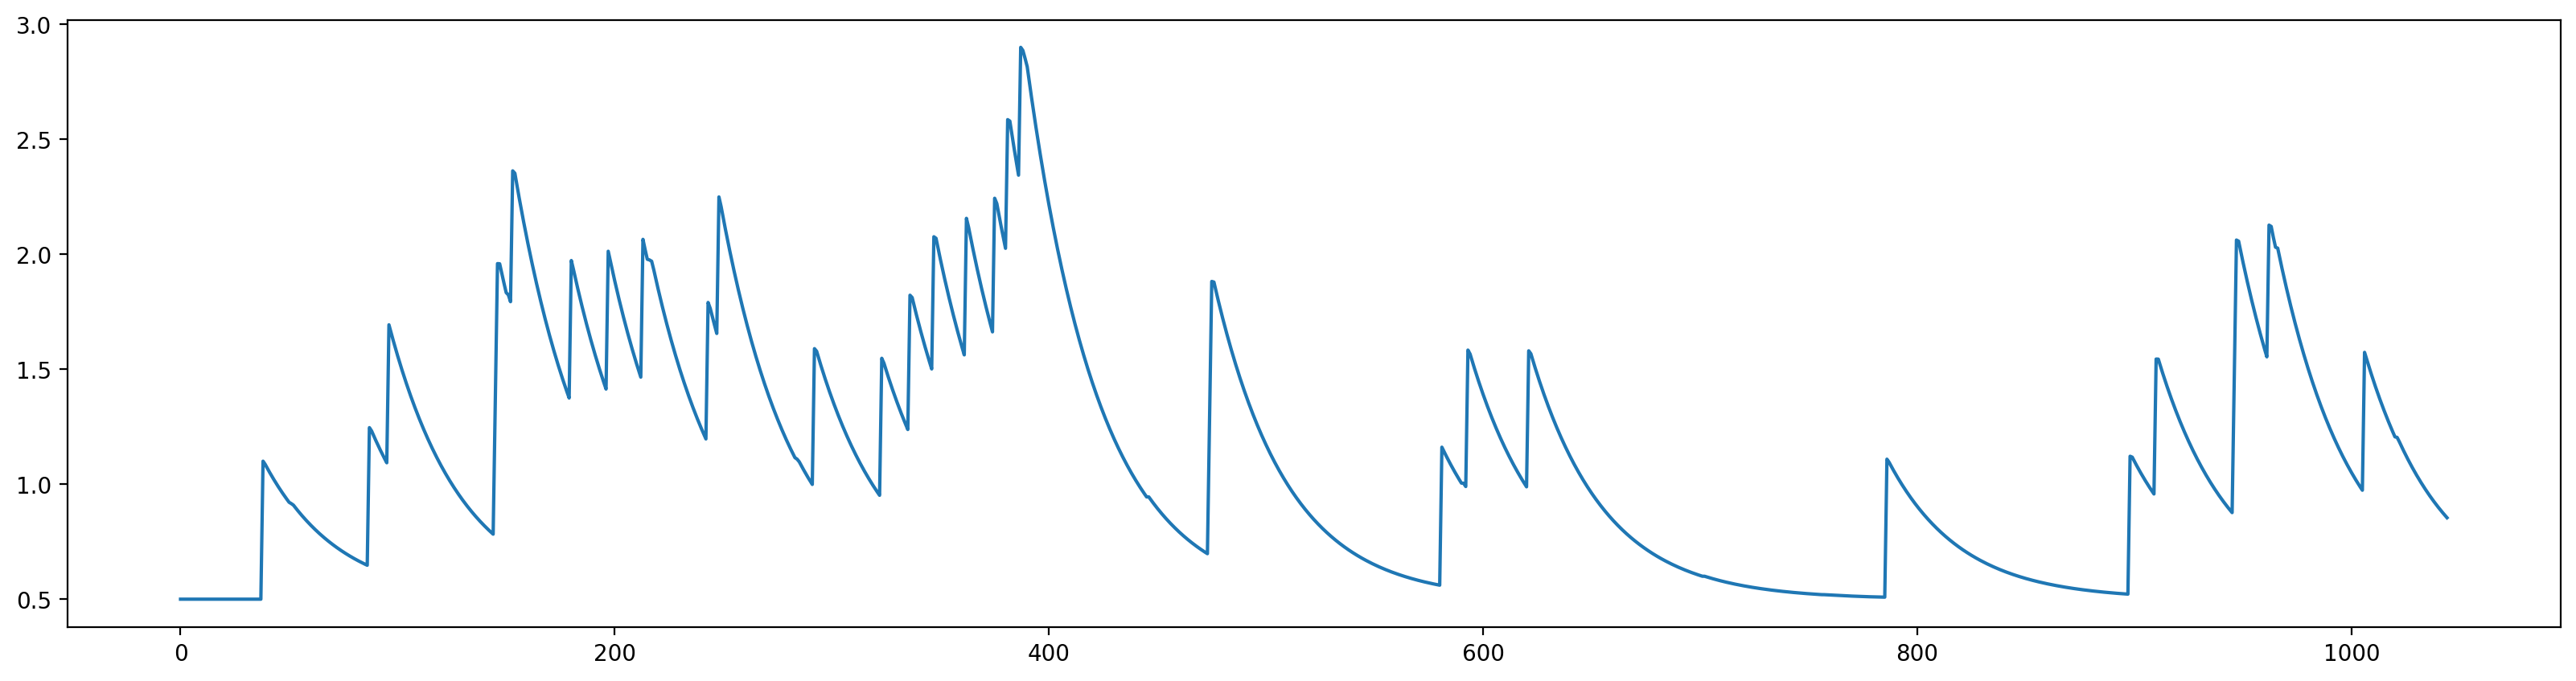

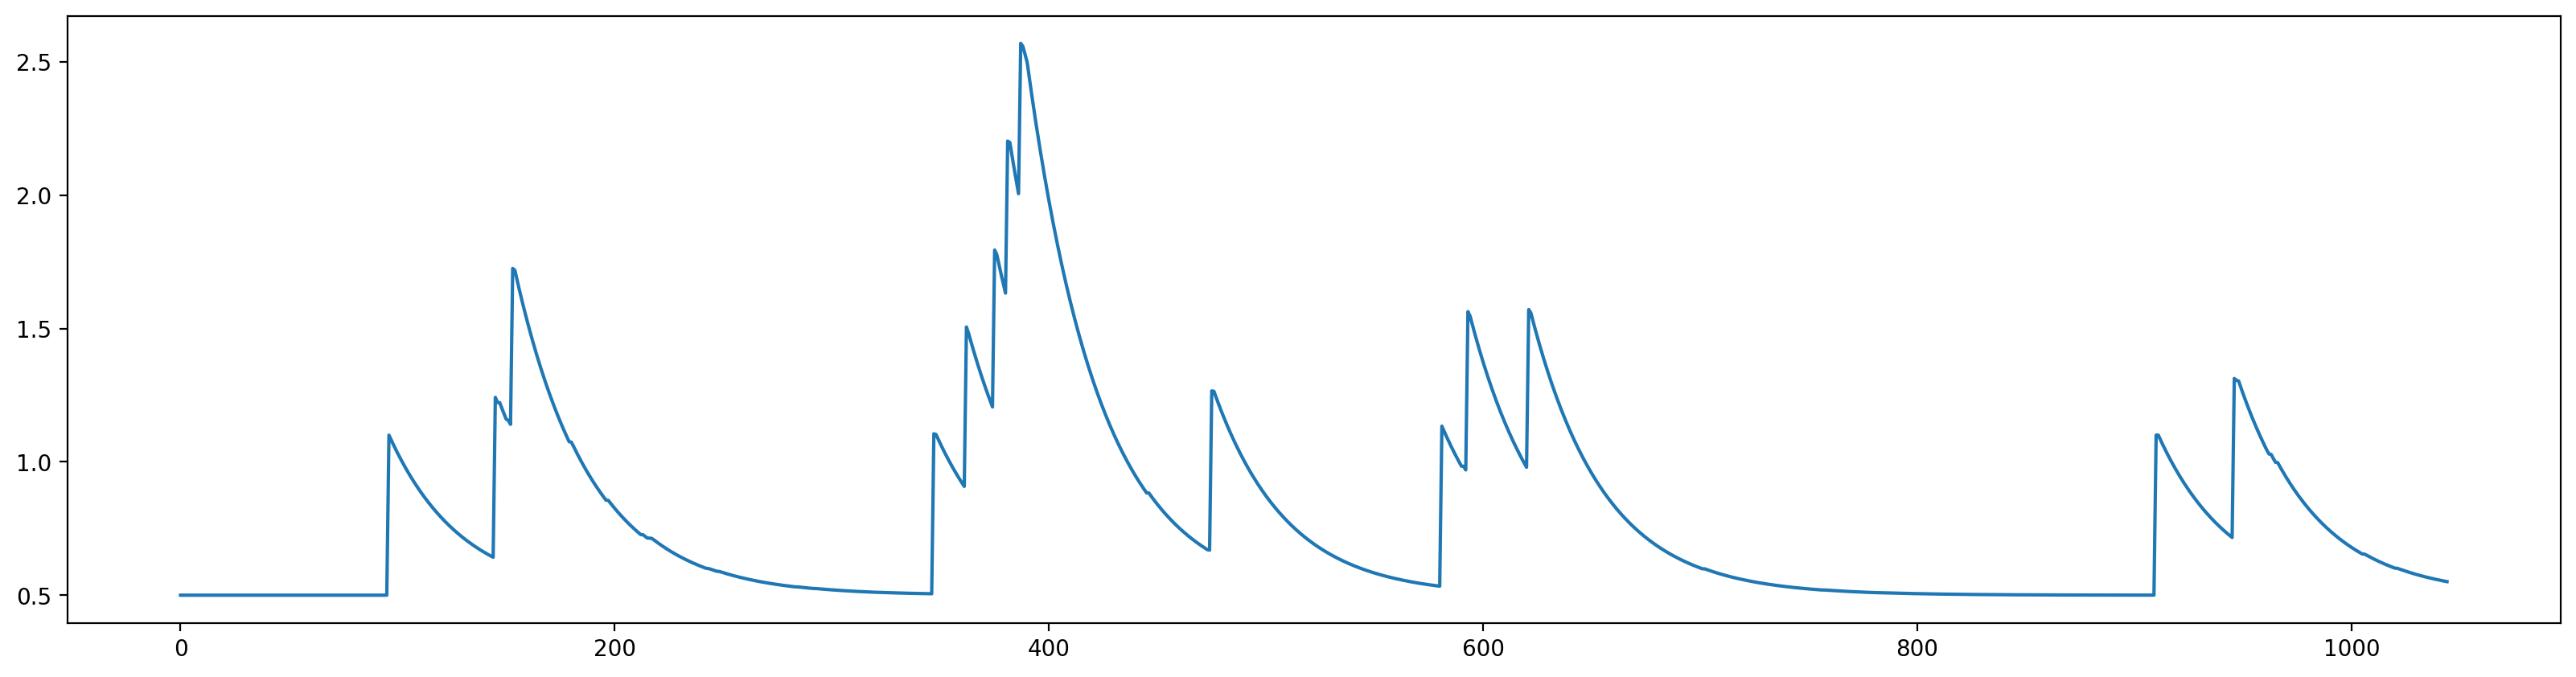

In [26]:
for intensity in intensities[2]:
    plt.figure(figsize=(20, 5), dpi=200)
    plt.plot(intensity)
    plt.show()

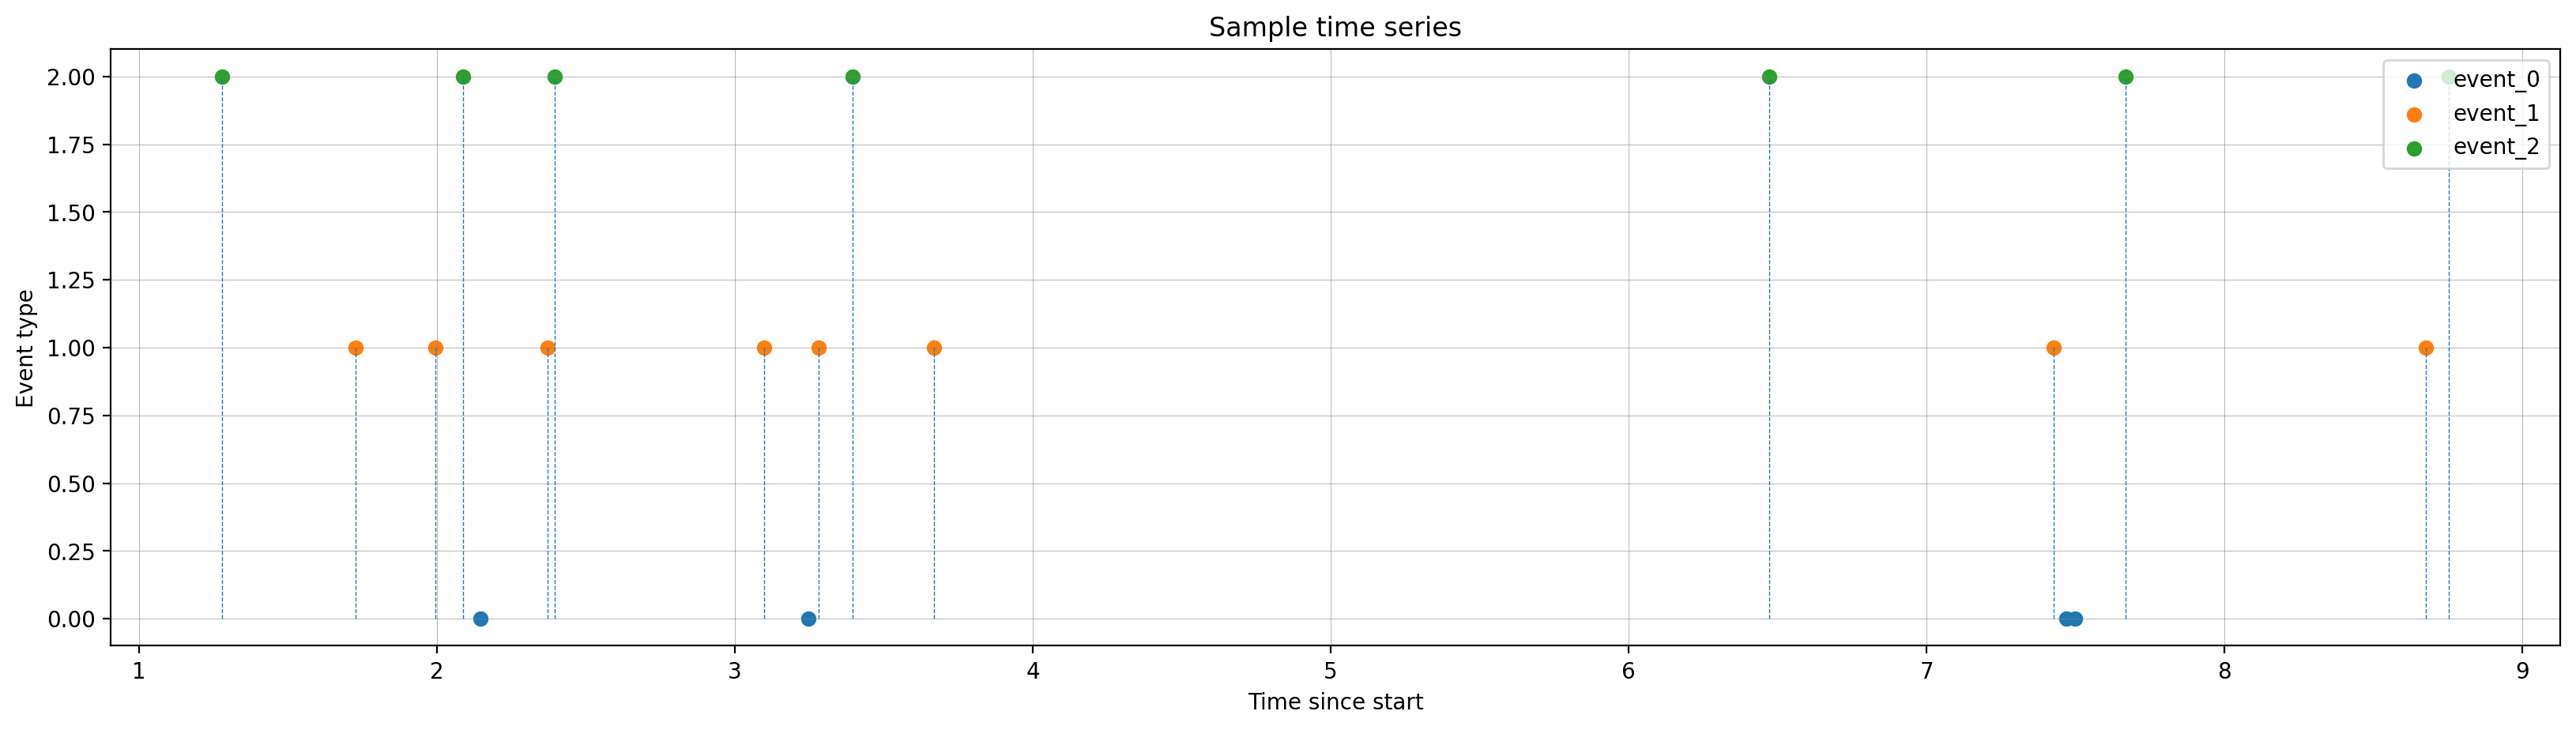

In [27]:
plot_sample_ts(dataset, 6, dim_process)